# 分類問題

## 郭耀仁

## 分類問題有哪些？

- 貸款顧客是否會倒帳
- 圖片辨識
- 垃圾郵件辨識
- ...etc.

In [1]:
import pandas as pd

labeled_url = "https://storage.googleapis.com/kaggle_datasets/Titanic-Machine-Learning-from-Disaster/train.csv"
test_url = "https://storage.googleapis.com/kaggle_datasets/Titanic-Machine-Learning-from-Disaster/test.csv"
labeled_df = pd.read_csv(labeled_url)
test_df = pd.read_csv(test_url)
print(labeled_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [2]:
labeled_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
labeled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


> Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as **women**, **children**, and the **upper-class**.

In [4]:
labeled_df = labeled_df[labeled_df["Age"].notna()]
labeled_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [5]:
import matplotlib.pyplot as plt

def plot_data(data, label_x, label_y, label_pos, label_neg, label_target):
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    neg = data[label_target] == 0
    pos = data[label_target] == 1
    ax.scatter(data[pos][label_x], data[pos][label_y], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    ax.scatter(data[neg][label_x], data[neg][label_y], c='y', s=10, label=label_neg, alpha = 0.5)
    ax.set_xlabel(label_x)
    ax.set_ylabel(label_y)
    ax.legend(frameon= True, fancybox = True)

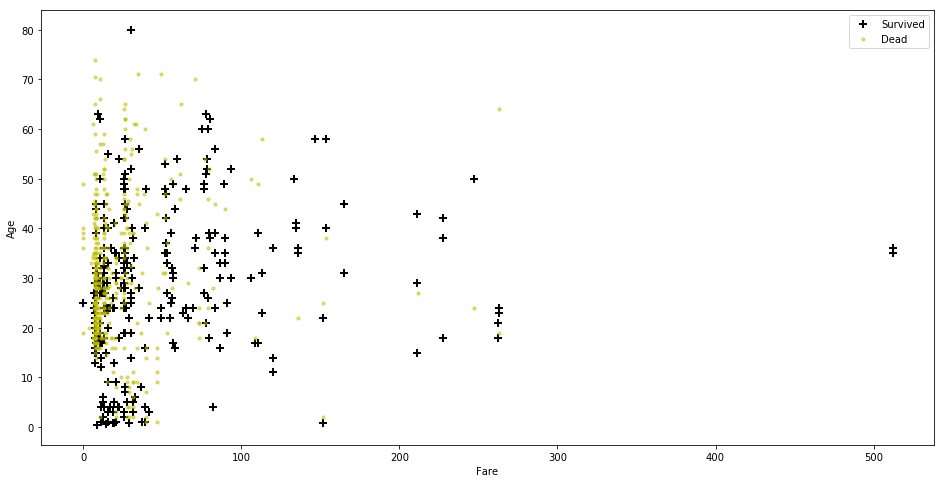

In [6]:
plot_data(labeled_df, "Fare", "Age", "Survived", "Dead", "Survived")
plt.show()

## 觀察性別的影響

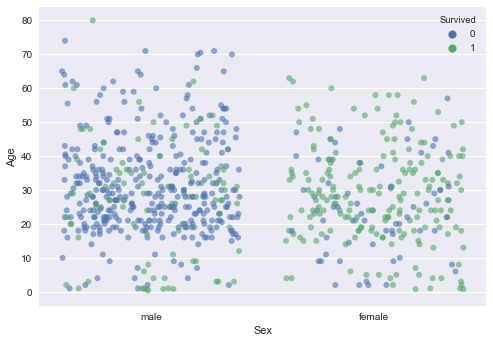

In [7]:
import seaborn as sns

sns.stripplot(x="Sex", y="Age", data=labeled_df, jitter=0.4, hue="Survived", alpha=0.6, size = 6)
plt.show()

## 分類問題其實是迴歸問題的延伸

## 將 $h(X) = X\theta$ 的結果利用**特定函數**轉換為簡單分類器

- 羅吉斯迴歸利用 **sigmoid** 函數

## 羅吉斯迴歸利用 sigmoid 函數

$$\hat{y} = H(g(X\theta))$$
其中，
$$g(X\theta) = \frac{1}{1+e^{-X\theta}}$$
$$g(z) = \frac{1}{1+e^{-z}}$$

In [8]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

## 隨堂練習：描繪出 Sigmoid 函數的外觀

In [9]:
import numpy as np

x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.axvline(0, color = 'black')
plt.axhline(y = 0, ls = ':', color = 'k', alpha = 0.5)
plt.axhline(y = 0.5, ls = ':', color = 'k', alpha = 0.5)
plt.axhline(y = 1, ls = ':', color = 'k', alpha = 0.5)
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.title("Sigmoid Function")

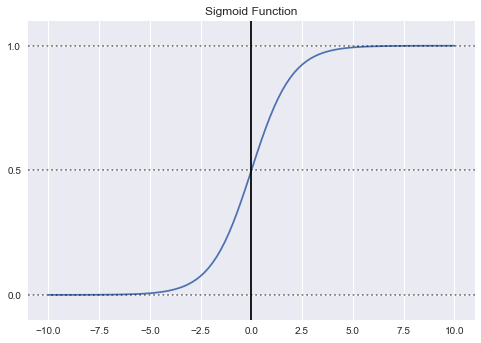

In [10]:
plt.show()

## 接著決定

- $g(z)$ 輸出的機率該如何轉換至 $\hat{y} \in {\{0, 1\}}$？

$$ \hat{y} = H(z) =
  \begin{cases}
    1       & \quad \text{if } z\geq 0.5\\
    0  & \quad \text{otherwise}\\
  \end{cases}
$$

## 拆解 Logistic 分類器的建立流程：

- 建立迴歸模型 $\hat{y} = X\theta$
- 將 $h$ 的輸出作為 Sigmoid 函數的輸入，得到 $g(X\theta)$
- 將 $g(X\theta)$ 作為 $H$ 的輸入，得到 $\hat{y}$

## 那麼 Logistic 分類器的成本函數該怎麼寫呢？

- 成本函數一般式

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$

- 成本函數矩陣式（vectorized）

$$ J(\theta) = -\frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

## 這個成本函數的含義為

- 讓錯誤分類的成本無限大

$$J(H(z), y) =
  \begin{cases}
    -\log(H(z))  & \quad \text{if } y = 1\\
    -\log(1 - H(z))  & \quad \text{if } y = 0\\
  \end{cases}
$$

In [11]:
import numpy as np

x = np.arange(0.01, 1, 0.01)
y1 = -np.log(x)
y2 = -np.log(1 - x)
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
plt.plot(x, y1)
plt.title("$-\log{H(z)}$")
plt.subplot(1, 2, 2)
plt.plot(x, y2)
plt.title("$-\log{(1-H(z))}$")
plt.tight_layout()

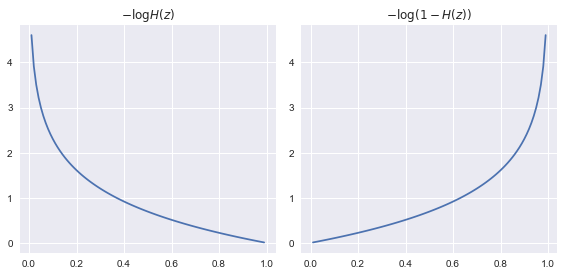

In [12]:
plt.show()

In [13]:
def cost_function(theta, X, y):
    m = y.shape[0]
    h = sigmoid(X.dot(theta))
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

## 利用 Gradient Descent 的方式求解 $\theta$

- 偏微分

$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 

- 偏微分矩陣式

$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y) $$

In [14]:
def gradient_descent(theta, X, y):
    m = y.shape[0]
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    grad =(1/m)*X.T.dot(h-y)
    return(grad.ravel())

In [15]:
from sklearn.model_selection import train_test_split

train_df, validation_df = train_test_split(labeled_df, test_size=0.3, random_state=123)
X_train = train_df[["Fare", "Age"]].values
y_train = train_df["Survived"].values.reshape(-1, 1)
ones = np.ones(X_train.shape[0]).reshape(-1, 1)
X_train = np.concatenate([ones, X_train], axis=1)
initial_theta = np.zeros(X_train.shape[1])
cost = cost_function(initial_theta, X_train, y_train)
grad = gradient_descent(initial_theta, X_train, y_train)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.69314718056
Grad: 
 [ 0.08717435 -4.86218778  2.78531062]


## 利用 scipy 的 `optimize()` 函數

In [16]:
from scipy.optimize import minimize

res = minimize(cost_function, initial_theta, args=(X_train, y_train), method=None, jac=gradient_descent, options={'maxiter':400})
res

/Users/kuoyaojen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/Users/kuoyaojen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


      fun: 0.6249923100906284
 hess_inv: array([[  2.57707497e+01,  -9.67852173e-02,  -6.39438923e-01],
       [ -9.67852173e-02,   4.31442824e-03,  -1.31976410e-03],
       [ -6.39438923e-01,  -1.31976410e-03,   2.32935569e-02]])
      jac: array([  5.79538929e-08,   3.06075254e-06,   1.65741052e-06])
  message: 'Optimization terminated successfully.'
     nfev: 23
      nit: 14
     njev: 18
   status: 0
  success: True
        x: array([-0.62176132,  0.01692017, -0.01014703])

In [17]:
thetas = res.x.reshape(-1, 1)
print(thetas)

[[-0.62176132]
 [ 0.01692017]
 [-0.01014703]]


In [18]:
# 將 validation_df 中的第一個觀測值拿出來試試看
X_validation = validation_df[["Fare", "Age"]].values
ones = np.ones(X_validation.shape[0]).reshape(-1, 1)
X_validation = np.concatenate([ones, X_validation], axis=1)
x_validation_0 = X_validation[0, :].reshape(-1, 1)
print(sigmoid(np.dot(thetas.T, x_validation_0))[0, 0])

0.397655381805


In [19]:
validation_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
651,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C


In [20]:
def predict(thetas, X, threshold=0.5):
    p = sigmoid(np.dot(X, thetas)) >= threshold
    return(p.astype(int))

In [21]:
is_survived = predict(thetas, x_validation_0.ravel())[0]
print("羅吉斯迴歸模型的預測是: {}".format(is_survived))
print("真實的情況是 :{}".format(validation_df["Survived"].values[0]))

羅吉斯迴歸模型的預測是: 0
真實的情況是 :1


## 跟標準答案比對一下

In [22]:
y_hat = predict(thetas, X_validation)
y_validation = validation_df["Survived"].values
y_hat.ravel() == y_validation

array([False,  True, False, False, False,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True, False,  True, False,  True,
        True,  True, False,  True, False, False, False,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True, False,

In [23]:
accuracy = (y_hat.ravel() == y_validation).sum() / y_validation.size
print("預測準確率為 {:.2f}%".format(accuracy * 100))

預測準確率為 66.05%


## 什麼是準確率呢？

- 要談準確率，或者說明分類模型的評估，不得不提[混淆矩陣](https://en.wikipedia.org/wiki/Confusion_matrix)

![](images/confusionmatrix.png)

## Phew...

- 我們終於又**手動**做出來了羅吉斯迴歸模型！

## 讓 Scikit-Learn 來找 $\theta$ 吧

In [24]:
from sklearn.linear_model import LogisticRegression

train_df, validation_df = train_test_split(labeled_df, test_size=0.3, random_state=123)
X_train = train_df[["Fare", "Age"]].values
y_train = train_df["Survived"].values
X_validation = validation_df[["Fare", "Age"]].values
y_validation = validation_df["Survived"].values
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_validation)
accuracy = (y_hat == y_validation).sum() / y_hat.size
print("預測準確率為 {:.2f}%".format(accuracy * 100))

預測準確率為 66.05%


## 隨堂練習：讓 Scikit-Learn 幫我們算出來混淆矩陣

## 決策邊界 Decision Boundary

- 在散佈圖上將 $X\theta$ 畫出來
- 該如何解讀圖形？

## 利用 mlxtend 模組的 `plot_decision_regions()`

In [25]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

validation_x_0 = validation_df.iloc[0, [5, 9]]
plot_decision_regions(labeled_df[["Fare", "Age"]].values, labeled_df["Survived"].values, clf = clf, res = 0.1)
plt.scatter(validation_x_0[1], validation_x_0[0], marker="*", s=500, color="g")
plt.xlabel('Fare')
plt.ylabel('Age')
plt.xlim(0, 300)
plt.title('Logistic Regression on Titanic')

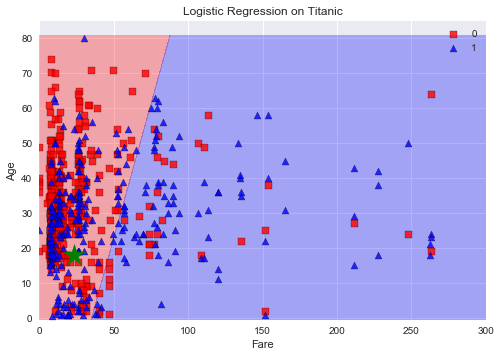

In [26]:
plt.show()

## 或是自己畫

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def step(g_y_hat, threshold=0.5):
    return np.where(g_y_hat >= threshold, 1, 0).reshape(-1, 1)

labeled = pd.read_csv("https://storage.googleapis.com/kaggle_datasets/Titanic-Machine-Learning-from-Disaster/train.csv")
# Removed observations without Age
labeled = labeled[~labeled["Age"].isna()]
survived = labeled[labeled["Survived"] == 1]
dead = labeled[labeled["Survived"] == 0]
train, validation = train_test_split(labeled, test_size=0.3, random_state=123)
X_train = train.loc[:, ["Fare", "Age"]].values
y_train = train.loc[:, "Survived"].values
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
fit_intercept = logistic_clf.intercept_.reshape(-1, 1)
fit_coef = logistic_clf.coef_.reshape(-1, 1)
thetas = np.concatenate([fit_intercept, fit_coef])
# Decision boundary plot
fare_min, fare_max = labeled["Fare"].min(), labeled["Fare"].max()
age_min, age_max = labeled["Age"].min(), labeled["Age"].max()
fare_arr = np.linspace(fare_min - 5, fare_max + 5, 1000)
age_arr = np.linspace(age_min - 5, age_max + 5, 1000)
xx, yy = np.meshgrid(fare_arr, age_arr)
ones = np.ones(xx.size).reshape(-1, 1)
X_grid = np.concatenate([ones, xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)
y_grid = np.dot(X_grid, thetas)
g_y_grid = sigmoid(y_grid)
y_grid_pred = step(g_y_grid)
Z = y_grid_pred.reshape(xx.shape)
plt.scatter(survived["Fare"], survived["Age"], label="Survived", marker="o", color="blue")
plt.scatter(dead["Fare"], dead["Age"], label="Dead", marker="x", color="red")
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm_r)
plt.legend(loc="upper right")
plt.xlabel("Fare")
plt.ylabel("Age")

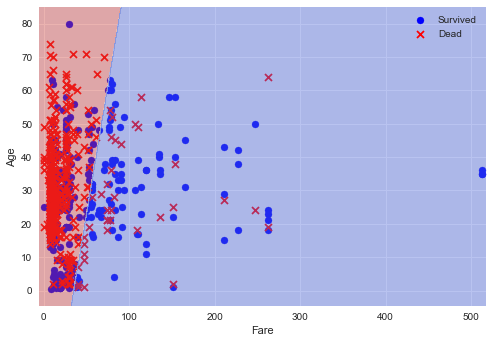

In [28]:
plt.show()

In [29]:
from matplotlib.colors import ListedColormap

def decision_boundary(X, labeled_df, clf):
    x1_min, x1_max = X[:,0].min()-5, X[:,0].max()+5,
    x2_min, x2_max = X[:,1].min()-5, X[:,1].max()+5,
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    thetas = np.hstack((clf.intercept_, clf.coef_.ravel())).reshape(-1, 1)
    ones = np.ones(xx1.size).reshape(-1, 1)
    xx_concat = np.concatenate([ones, xx1.reshape(-1, 1), xx2.reshape(-1, 1)], axis=1)
    h = sigmoid(xx_concat.dot(thetas))
    h = h.reshape(xx1.shape)
    plot_data(labeled_df, "Fare", "Age", "Survived", "Dead", "Survived")
    plt.contour(xx1, xx2, h, [0.5], linewidths=3, colors='#FF69B4')
    #cmap=ListedColormap(["y", "k"])
    #plt.contourf(xx1, xx2, h, alpha=0.3, cmap=cmap, antialiased=True)
    plt.xlim(0, x1_max)
    plt.ylim(0, x2_max)

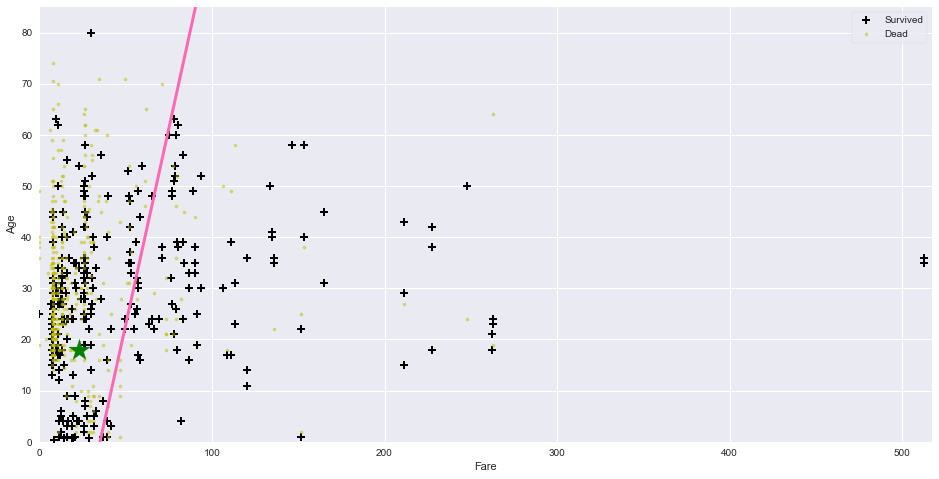

In [30]:
decision_boundary(labeled_df[["Fare", "Age"]].values, labeled_df, clf)
validation_x_0 = validation_df.iloc[0, [5, 9]]
plt.scatter(validation_x_0[1], validation_x_0[0], marker="*", s=500, color="g")
plt.show()

## 增強決策邊界

- 我們可以如同在迴歸問題中增加 $X$ 的次方項

In [31]:
from sklearn.preprocessing import PolynomialFeatures

train_df, validation_df = train_test_split(labeled_df, test_size=0.3, random_state=123)
X_train = train_df[["Fare", "Age"]].values
y_train = train_df["Survived"].values
X_validation = validation_df[["Fare", "Age"]].values
y_validation = validation_df["Survived"].values

d = 6
X_train_poly = PolynomialFeatures(d).fit_transform(X_train)
X_validation_poly = PolynomialFeatures(d).fit_transform(X_validation)

In [32]:
clf_poly = LogisticRegression()
clf_poly.fit(X_train_poly, y_train)
y_hat = clf_poly.predict(X_validation_poly)
accuracy = (y_hat == y_validation).sum() / y_hat.size
print("預測準確率為 {:.2f}%".format(accuracy * 100))

預測準確率為 69.30%


In [33]:
def decision_boundary(X, labeled_df, clf):
    x1_min, x1_max = X[:,0].min()-5, X[:,0].max()+5,
    x2_min, x2_max = X[:,1].min()-5, X[:,1].max()+5,
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    thetas = np.hstack((clf.intercept_, clf.coef_.ravel())).reshape(-1, 1)
    xx_concat = np.concatenate([xx1.reshape(-1, 1), xx2.reshape(-1, 1)], axis=1)
    d = 6
    xx_concat_poly = PolynomialFeatures(d).fit_transform(xx_concat)
    ones = np.ones(xx1.size).reshape(-1, 1)
    xx_concat_poly = np.concatenate([ones, xx_concat_poly], axis=1)
    h = sigmoid(xx_concat_poly.dot(thetas))
    h = h.reshape(xx1.shape)
    plot_data(labeled_df, "Fare", "Age", "Survived", "Dead", "Survived")
    plt.contour(xx1, xx2, h, [0.5], linewidths=3, colors='#FF69B4')
    #cmap=ListedColormap(["y", "k"])
    #plt.contourf(xx1, xx2, h, alpha=0.2, cmap=cmap, antialiased=True)
    plt.xlim(0, x1_max)
    plt.ylim(0, x2_max)

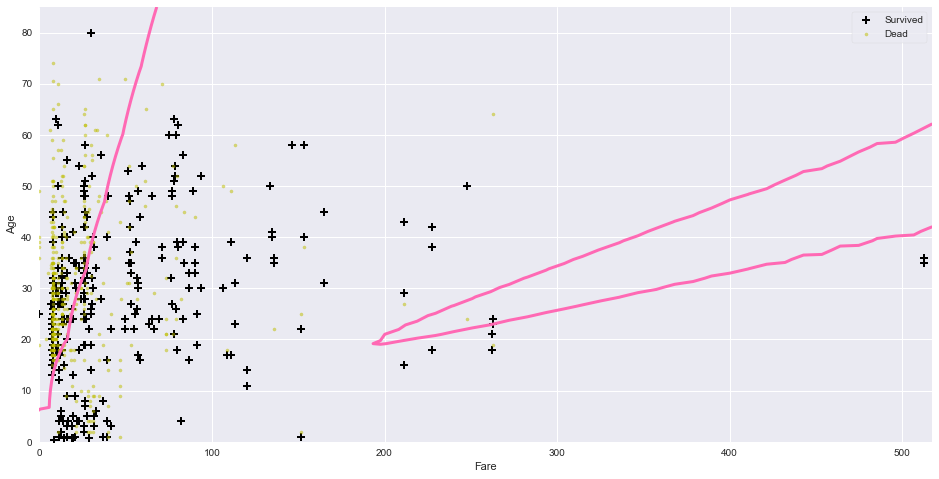

In [34]:
decision_boundary(labeled_df[["Fare", "Age"]].values, labeled_df, clf_poly)
plt.show()

## 延伸二元分類到多元分類問題：One-vs-all

$$y \in {\{0, 1, 2\}}$$
$$h^{0}(x) = P(y = 0 \mid x; \theta)$$
$$h^{1}(x) = P(y = 1 \mid x; \theta)$$
$$h^{2}(x) = P(y = 2 \mid x; \theta)$$
$$\text{prediction:}\;\;max(h^{0}(x), h^{1}(x), h^{2}(x))$$

In [35]:
import random
import numpy as np
import matplotlib.pyplot as plt

x_arr = np.arange(1, 13)
y_arr_length = [3, 4, 5]
random.seed(123)
y_arr_1 = x_arr[:3] + np.array(random.choices(np.arange(10, 15, 0.1), k = y_arr_length[0]))
y_arr_2 = x_arr[3:7] + np.array(random.choices(np.arange(0, 5, 0.1), k = y_arr_length[1]))
y_arr_3 = x_arr[7:] + np.array(random.choices(np.arange(5, 10, 0.1), k = y_arr_length[2]))
plt.scatter(x_arr[:3], y_arr_1, c = 'g', marker = '^', s = 200)
plt.scatter(x_arr[3:7], y_arr_2, c = 'b', marker = 's', s = 200)
plt.scatter(x_arr[7:], y_arr_3, c = 'r', marker = 'x', s = 200)

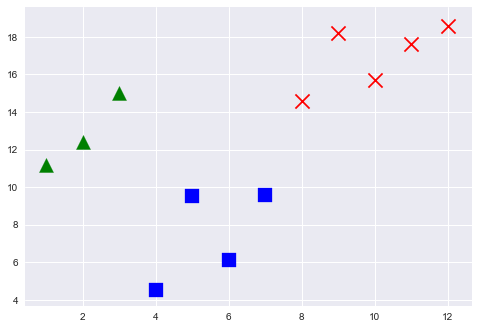

In [36]:
plt.show()

In [37]:
import numpy as np
import matplotlib.pyplot as plt

x_arr = np.arange(1, 13)
y_arr_length = [3, 4, 5]
random.seed(123)
y_arr_1 = x_arr[:3] + np.array(random.choices(np.arange(10, 15, 0.1), k = y_arr_length[0]))
y_arr_2 = x_arr[3:7] + np.array(random.choices(np.arange(0, 5, 0.1), k = y_arr_length[1]))
y_arr_3 = x_arr[7:] + np.array(random.choices(np.arange(5, 10, 0.1), k = y_arr_length[2]))
plt.figure(1, figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(x_arr[:3], y_arr_1, c = 'g', marker = '^', s = 200)
plt.scatter(x_arr[3:], np.concatenate([y_arr_2, y_arr_3]), c = 'k', marker = 'o', s = 200)
plt.plot([2, 5], [2, 18])
plt.subplot(1, 3, 2)
plt.scatter(x_arr[3:7], y_arr_2, c = 'b', marker = 's', s = 200)
plt.scatter(np.concatenate([x_arr[:3], x_arr[7:]]), np.concatenate([y_arr_1, y_arr_3]), c = 'k', marker = 'o', s = 200)
plt.plot([0, 15], [10, 12])
plt.subplot(1, 3, 3)
plt.scatter(x_arr[7:], y_arr_3, c = 'r', marker = 'x', s = 200)
plt.scatter(x_arr[:7], np.concatenate([y_arr_1, y_arr_2]), c = 'k', marker = 'o', s = 200)
plt.plot([5, 10], [20, 3])

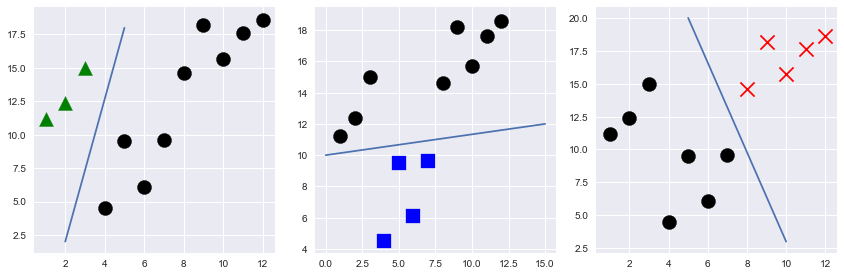

In [38]:
plt.tight_layout()
plt.show()

## 手寫數字圖片辨識

In [39]:
import pandas as pd

labeled_df_url = "https://storage.googleapis.com/kaggle_datasets/Digit-Recognizer/train.csv"
test_df_url = "https://storage.googleapis.com/kaggle_datasets/Digit-Recognizer/test.csv"

labeled_df = pd.read_csv(labeled_df_url)
test_df = pd.read_csv(test_df_url)

In [40]:
print(labeled_df.shape)
print(test_df.shape)

(42000, 785)
(28000, 784)


In [41]:
labeled_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X_train_arr = labeled_df.iloc[:, 1:].values.astype(float)
y_train_arr = labeled_df.iloc[:, 0].values.astype(float)
X_test_arr = test_df.values.astype(float)

In [44]:
def plot_first_10(arr_set):
    for i, k in enumerate(range(1, 11)):
        plt.subplot(2, 5, k)
        plt.imshow(arr_set.reshape(arr_set.shape[0], 28, 28)[i], cmap = "gray")
        plt.xticks([]), plt.yticks([])

    plt.tight_layout()
    plt.show()

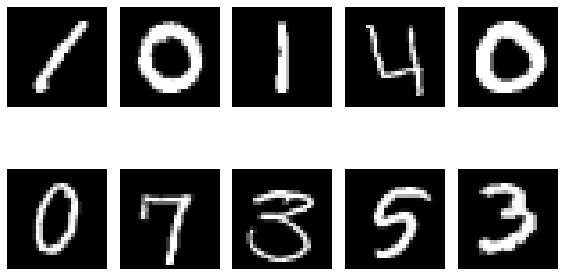

In [45]:
plot_first_10(X_train_arr)

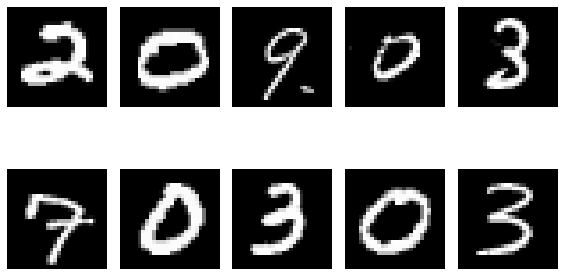

In [46]:
plot_first_10(X_test_arr)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(C=100000)
acc = np.mean(cross_val_score(clf, X_train_arr[:3000, :], y_train_arr[:3000], cv = 10, scoring = 'accuracy')) # not to takes too long...

In [48]:
print("準確率：{:.2f}%".format(acc*100))

準確率：81.43%
